In [1]:
# pandas : 데이터 분석용 모듈
import pandas as pd

In [2]:
# 인천 대중교통 정류장 이용율 차이에 따른 아파트 가격 분석
# 상위 지역 : [미추홀구](남동구) 롯데백화점(인천터미널) - 관교동, 구월3동(남동구) 등
# 하위 지역 : [부평구]   굴포천역 : 삼산2동, 부평4동

# 기준 : 주변 반경 1km 내 아파트

# 아파트 매매 실거래가 출처 : 
# - https://www.koreacharts.com/real-estate/apt-trade.html


In [3]:
# 엑셀 파일 불러오기
MC2301_EXCEL='./INCHEON_MICHOOHOL_23_01.xlsx'
MC2312_EXCEL='./INCHEON_MICHOOHOL_23_12.xlsx'
BP2301_EXCEL='./INCHEON_BUPYEONG_23_01.xlsx'
BP2312_EXCEL='./INCHEON_BUPYEONG_23_12.xlsx'

# 롯데백화점(인천터미널) 정류장의 경우 미추홀구와 남동구 경계에 있어 
#   미추홀구, 남동구 자료를 사용함
# 한정된 실거래량으로 각 두 달치의 거래량을 분석함
#  - 23.01 : 22.12, 23.01
#  - 23.12 : 23.12, 24.01


In [6]:
# 엑셀 파일 pandas로 읽기
MC2301=pd.read_excel(MC2301_EXCEL)
MC2312=pd.read_excel(MC2312_EXCEL)
BP2301=pd.read_excel(BP2301_EXCEL)
BP2312=pd.read_excel(BP2312_EXCEL)

In [7]:
# 엑셀 => CSV 파일 변환
MC2301.to_csv('Incheon_MC2301.csv')
MC2312.to_csv('Incheon_MC2312.csv')
BP2301.to_csv('Incheon_BP2301.csv')
BP2312.to_csv('Incheon_BP2312.csv')

In [12]:
# 면적(전용면적) 국민평수 약 84㎡ 로 한정
MC2301=MC2301[(MC2301['면적']>84) & (MC2301['면적']<85)]
MC2312=MC2312[(MC2312['면적']>84) & (MC2312['면적']<85)]
BP2301=BP2301[(BP2301['면적']>84) & (BP2301['면적']<85)]
BP2312=BP2312[(BP2312['면적']>84) & (BP2312['면적']<85)]

MC2301

,아파트,금액(만원),면적,층,주소
2,더샵인천스카이타워1단지,50000,84.94,47,도화동 1011
5,더샵인천스카이타워1단지,49800,84.98,28,도화동 1011
6,더샵인천스카이타워2단지,49500,84.94,23,도화동 1002
12,엘에이치미추홀퍼스트,46000,84.73,18,용현동 지구BL2
17,더샵인천스카이타워1단지,43000,84.94,2,도화동 1011
...,...,...,...,...,...
560,서창퍼스트뷰(7단지),33800,84.72,14,서창동 699
565,에코에비뉴,32200,84.94,2,서창동 695
579,벽산,28000,84.93,3,만수동 1114
580,신동아,27500,84.91,9,만수동 5-426


In [21]:
# 아파트 이름순으로 정렬한 CSV 파일 생성

MC2301_84=MC2301.sort_values('아파트')
MC2301_84.to_csv('Incheon_abc_MC2301_84.csv')

MC2312_84=MC2312.sort_values('아파트')
MC2312_84.to_csv('Incheon_abc_MC2312_84.csv')

BP2301_84=BP2301.sort_values('아파트')
BP2301_84.to_csv('Incheon_abc_BP2301_84.csv')

BP2312_84=BP2312.sort_values('아파트')
BP2312_84.to_csv('Incheon_abc_BP2312_84.csv')

In [35]:
# 두 기간 모두 거래된 아파트 추출
MCsame = pd.merge(MC2301_84, MC2312_84, on='아파트', 
                             suffixes=('Incheon_abc_MC2301_84.csv', 'Incheon_abc_MC2312_84.csv'))
MCsame.to_csv('MC_same.csv')

In [36]:
# 중복 제거 후 아파트명만 추출
MCsame_names = MCsame['아파트'].drop_duplicates()
MCsame_names.to_csv('MC_same_names.csv')

In [37]:
BPsame = pd.merge(BP2301_84, BP2312_84, on='아파트', 
                             suffixes=('Incheon_abc_BP2301_84.csv', 'Incheon_abc_BP2312_84.csv'))
BPsame.to_csv('BP_same.csv')

In [38]:
# 중복 제거 후 아파트명만 추출
BPsame_names = BPsame['아파트'].drop_duplicates()
BPsame_names.to_csv('BP_same_names.csv')

In [39]:
# 아파트 브랜드 : 래미안 추출
MC2301_84_RMA=MC2301_84[MC2301_84['아파트'].str.contains('래미안')]
MC2312_84_RMA=MC2312_84[MC2312_84['아파트'].str.contains('래미안')]
BP2301_84_RMA=BP2301_84[BP2301_84['아파트'].str.contains('래미안')]
BP2312_84_RMA=BP2312_84[BP2312_84['아파트'].str.contains('래미안')]

print(f'{MC2301_84_RMA}\n{MC2312_84_RMA}\n{BP2301_84_RMA}\n{BP2312_84_RMA}')

         아파트  금액(만원)     면적   층         주소
461  간석래미안자이   56000  84.98  22  간석동 939-1
         아파트  금액(만원)     면적   층         주소
638  간석래미안자이   50000  84.98  13  간석동 939-1
637  간석래미안자이   50000  84.97  10  간석동 939-1
635  간석래미안자이   50500  84.97   6  간석동 939-1
632  간석래미안자이   51000  84.98  14  간석동 939-1
378  간석래미안자이   50000  84.97   8  간석동 939-1
370  간석래미안자이   51500  84.97  23  간석동 939-1
612  간석래미안자이   55000  84.98  20  간석동 939-1
614  간석래미안자이   54500  84.97  12  간석동 939-1
       아파트  금액(만원)     면적  층       주소
168  래미안부평   59900  84.96  7  부평동 947
12   래미안부평   50000  84.96  5  부평동 947
     아파트  금액(만원)     면적   층       주소
8  래미안부평   63000  84.96  12  부평동 947


In [41]:
# 아파트 브랜드 : 금호타운 추출
MC2301_84_GH=MC2301_84[MC2301_84['아파트'].str.contains('용현2단지금호타운')]
MC2312_84_GH=MC2312_84[MC2312_84['아파트'].str.contains('용현2단지금호타운')]
BP2301_84_GH=BP2301_84[BP2301_84['아파트'].str.contains('부평1,2차금호타운')]
BP2312_84_GH=BP2312_84[BP2312_84['아파트'].str.contains('부평1,2차금호타운')]

print(f'{MC2301_84_GH}\n{MC2312_84_GH}\n{BP2301_84_GH}\n{BP2312_84_GH}')

           아파트  금액(만원)     면적   층       주소
156  용현2단지금호타운   34500  84.53  11  용현동 647
           아파트  금액(만원)     면적   층       주소
78   용현2단지금호타운   29500  84.53  11  용현동 647
70   용현2단지금호타운   30300  84.53  11  용현동 647
251  용현2단지금호타운   30000  84.53   2  용현동 647
            아파트  금액(만원)     면적  층       주소
187  부평1,2차금호타운   40500  84.85  5  청천동 200
193  부평1,2차금호타운   40000  84.85  6  청천동 200
            아파트  금액(만원)     면적   층       주소
297  부평1,2차금호타운   38900  84.85   9  청천동 200
273  부평1,2차금호타운   45000  84.85  15  청천동 200
278  부평1,2차금호타운   43500  84.85   9  청천동 200
285  부평1,2차금호타운   41200  84.85   4  청천동 200
283  부평1,2차금호타운   41500  84.85  10  청천동 200


In [43]:
# 아파트 브랜드 : 푸르지오 추출
MC2301_84_PRGO=MC2301_84[MC2301_84['아파트'].str.contains('서창센트럴푸르지오')]
MC2312_84_PRGO=MC2312_84[MC2312_84['아파트'].str.contains('서창센트럴푸르지오')]
BP2301_84_PRGO=BP2301_84[BP2301_84['아파트'].str.contains('청천푸르지오')]
BP2312_84_PRGO=BP2312_84[BP2312_84['아파트'].str.contains('청천푸르지오')]

print(f'{MC2301_84_PRGO}\n{MC2312_84_PRGO}\n{BP2301_84_PRGO}\n{BP2312_84_PRGO}')

           아파트  금액(만원)     면적   층       주소
269  서창센트럴푸르지오   44900  84.98  10  서창동 682
271  서창센트럴푸르지오   44500  84.98  14  서창동 682
496  서창센트럴푸르지오   43000  84.98  17  서창동 682
292  서창센트럴푸르지오   42000  84.98   2  서창동 682
276  서창센트럴푸르지오   43500  84.98  11  서창동 682
           아파트  금액(만원)     면적   층       주소
360  서창센트럴푸르지오   53000  84.98  19  서창동 682
372  서창센트럴푸르지오   51000  84.98  22  서창동 682
        아파트  금액(만원)     면적   층       주소
38   청천푸르지오   35400  84.34  14  청천동 176
48   청천푸르지오   33100  84.34  23  청천동 176
198  청천푸르지오   38250  84.34  11  청천동 176
54   청천푸르지오   33000  84.34  25  청천동 176
56   청천푸르지오   32900  84.34  23  청천동 176
59   청천푸르지오   32500  84.34  21  청천동 176
64   청천푸르지오   31600  84.34   3  청천동 176
213  청천푸르지오   32000  84.34  19  청천동 176
53   청천푸르지오   33000  84.34  16  청천동 176
        아파트  금액(만원)     면적   층       주소
81   청천푸르지오   32500  84.34   2  청천동 176
68   청천푸르지오   34400  84.34  12  청천동 176
345  청천푸르지오   34500  84.34   4  청천동 176
388  청천푸르지오   31500  84.34   1  청천동 176
362  청천푸르지오  

In [45]:
# 아파트 브랜드 : 신동아 추출
MC2301_84_SDA=MC2301_84[MC2301_84['아파트'].str.contains('도화동신동아파밀리에')]
MC2312_84_SDA=MC2312_84[MC2312_84['아파트'].str.contains('도화동신동아파밀리에')]
BP2301_84_SDA=BP2301_84[BP2301_84['아파트'].str.contains('신동아')]
BP2312_84_SDA=BP2312_84[BP2312_84['아파트'].str.contains('신동아')]

print(f'{MC2301_84_SDA}\n{MC2312_84_SDA}\n{BP2301_84_SDA}\n{BP2312_84_SDA}')

           아파트  금액(만원)     면적  층       주소
58  도화동신동아파밀리에   30000  84.69  1  도화동 982
            아파트  금액(만원)     면적   층       주소
74   도화동신동아파밀리에   29900  84.69  24  도화동 982
249  도화동신동아파밀리에   30000  84.69  20  도화동 982
      아파트  금액(만원)     면적  층       주소
76  동암신동아   30000  84.94  6  십정동 607
       아파트  금액(만원)     면적   층       주소
69   동암신동아   34000  84.94  13  십정동 607
371  동암신동아   32200  84.94   2  십정동 607
364  동암신동아   33000  84.94   5  십정동 607
349  동암신동아   34000  84.94   8  십정동 607
70   동암신동아   34000  84.94  19  십정동 607
346  동암신동아   34500  84.94   3  십정동 607
337  동암신동아   34900  84.94  10  십정동 607
325  동암신동아   35600  84.94  10  십정동 607


In [46]:
# 래미안
print(f'{MC2301_84_RMA}\n{MC2312_84_RMA}\n{BP2301_84_RMA}\n{BP2312_84_RMA}')
# 금호타운
print(f'{MC2301_84_GH}\n{MC2312_84_GH}\n{BP2301_84_GH}\n{BP2312_84_GH}')
# 푸르지오
print(f'{MC2301_84_PRGO}\n{MC2312_84_PRGO}\n{BP2301_84_PRGO}\n{BP2312_84_PRGO}')
# 신동아
print(f'{MC2301_84_SDA}\n{MC2312_84_SDA}\n{BP2301_84_SDA}\n{BP2312_84_SDA}')


         아파트  금액(만원)     면적   층         주소
461  간석래미안자이   56000  84.98  22  간석동 939-1
         아파트  금액(만원)     면적   층         주소
638  간석래미안자이   50000  84.98  13  간석동 939-1
637  간석래미안자이   50000  84.97  10  간석동 939-1
635  간석래미안자이   50500  84.97   6  간석동 939-1
632  간석래미안자이   51000  84.98  14  간석동 939-1
378  간석래미안자이   50000  84.97   8  간석동 939-1
370  간석래미안자이   51500  84.97  23  간석동 939-1
612  간석래미안자이   55000  84.98  20  간석동 939-1
614  간석래미안자이   54500  84.97  12  간석동 939-1
       아파트  금액(만원)     면적  층       주소
168  래미안부평   59900  84.96  7  부평동 947
12   래미안부평   50000  84.96  5  부평동 947
     아파트  금액(만원)     면적   층       주소
8  래미안부평   63000  84.96  12  부평동 947
           아파트  금액(만원)     면적   층       주소
156  용현2단지금호타운   34500  84.53  11  용현동 647
           아파트  금액(만원)     면적   층       주소
78   용현2단지금호타운   29500  84.53  11  용현동 647
70   용현2단지금호타운   30300  84.53  11  용현동 647
251  용현2단지금호타운   30000  84.53   2  용현동 647
            아파트  금액(만원)     면적  층       주소
187  부평1,2차금호타운   40500  84.85  5  청천동

In [63]:
# 금액(만원) Dtype : int64인지 일일히 확인
BP2312_84_SDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 69 to 325
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아파트     8 non-null      object 
 1   금액(만원)  8 non-null      int64  
 2   면적      8 non-null      float64
 3   층       8 non-null      int64  
 4   주소      8 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 384.0+ bytes


In [79]:
# 청아람 북구 평균값 변동 추이
BUKGU2301_CAR_MEAN = BUKGU2301_CAR_Summary.loc['mean', '금액(만원)']
BUKGU2312_CAR_MEAN = BUKGU2312_CAR_Summary.loc['mean', '금액(만원)']
change_amount = BUKGU2312_CAR_MEAN - BUKGU2301_CAR_MEAN
change_rate = (change_amount / BUKGU2301_CAR_MEAN) * 100
print(f"\n청아람 북구 평균값 변동 추이:")
print(f"23년 01월 평균값: {BUKGU2301_CAR_MEAN:.2f} 만원")
print(f"23년 12월 평균값: {BUKGU2312_CAR_MEAN:.2f} 만원")
print(f"변동 금액: {change_amount:.2f} 만원")
print(f"변동 비율: {change_rate:.2f} %")



[ 미추홀구 - 래미안 ]
변동 금액: -4437.5
변동 비율(%): -7.924107142857142

[ 부평구 - 래미안 ]
변동 금액: 8050.0
변동 비율(%): 14.64968152866242



[ 미추홀구 - 금호타운 ]
변동 금액: -4566.666666666668
변동 비율(%): -13.236714975845414

[ 부평구 - 금호타운 ]
변동 금액: 1770.0
변동 비율(%): 4.39751552795031



[ 미추홀구 - 푸르지오 ]
변동 금액: 8420.0
변동 비율(%): 19.32078935291418

[ 부평구 - 푸르지오 ]
변동 금액: 150.0
변동 비율(%): 0.4473902236951118



[ 미추홀구 - 신동아 ]
변동 금액: -50.0
변동 비율(%): -0.16666666666666669

[ 부평구 - 신동아 ]
변동 금액: 4025.0
변동 비율(%): 13.416666666666666


In [90]:
import matplotlib.pyplot as plt

          점선 : 부평구        실선 : 미추홀구
          점선 : 부평구        실선 : 미추홀구
          점선 : 부평구        실선 : 미추홀구
          점선 : 부평구        실선 : 미추홀구


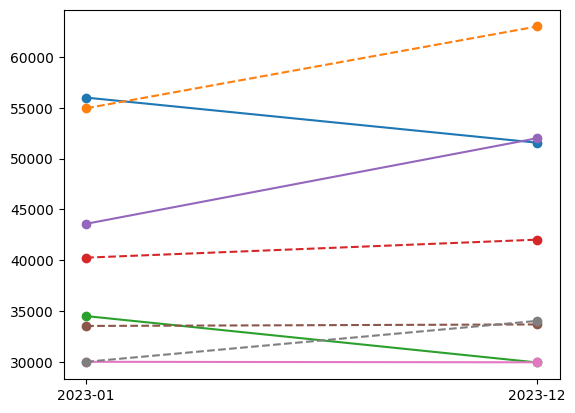

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_12380\2355919153.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\KDP-27\anaconda3\envs\DR97\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDP-27\anaconda3\envs\DR97\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDP-27\anaconda3\envs\DR97\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDP-27\anaconda3\envs\DR97\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyp

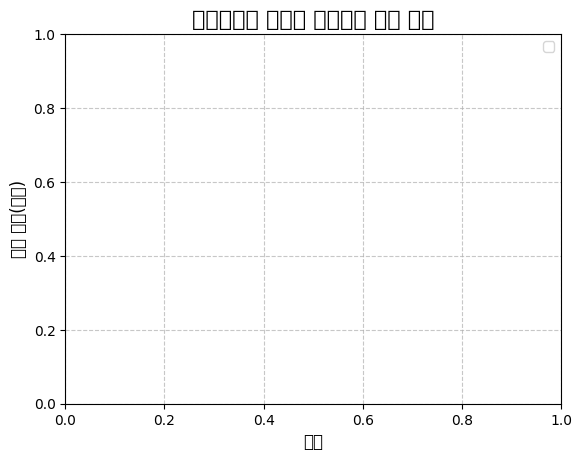

          점선 : 부평구        실선 : 미추홀구
